<a href="https://colab.research.google.com/github/arvindnswamy/BoundaryLayers/blob/master/MECEE6313_HW6P1and2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The code here can be used for problem 1 and problem 2 of HW 6. 

In solving this problem, you need to find $\theta'(0; Pr)$. 
$q_w(x) = -k \left.\frac{\partial T}{\partial y}\right\rvert_{x=0} = -k(T_w - T_f) \frac{1}{\sqrt{\nu x/U_{\infty}}} \left.\frac{d\theta}{d\eta}\right\rvert_{\eta=0}$.

Of course, we don't want to plot a dimensional quantity like $q_w(x)$ or $h(x) = \frac{q_w(x)}{T_w-T_{\infty}}$. Hence, we plot $Nu_x = h(x)x/k$.

$Nu_x = \frac{h(x) x}{k} = -\sqrt{\frac{U_{\infty}x}{\nu}} \theta'(0;Pr) $. Hence, we should be plotting $-\theta'(0; Pr)$ vs $Pr$ (rather than $\theta'(0; Pr)$).


In solving the ODE, we need to truncate the range of $\eta$. I ususally choose $\eta$ to go from 0 to 10.0. This is good enough for the momentum problem and the thermal problem for moderate to high $Pr$ number fluids. 
For low $Pr$, you need more of $\eta$ because the thermal boundary layer extends more than the momentum bundary layer. I have taken care of that in the code:


```
xmax = np.max((10.0, 10*(1/p)**(0.5))) #Code to increase the range over which eta is integrated for low Pr fluids
```

How do you find $f''(0)$? The array of values of $f''$ are stored in sol.y[2]. We want just the value at $\eta = 0$. Hence, sol.y[2][0]. We obtain the value as 0.32206.

How to find the value of $\eta$ at which $u = 0.99 U_{\infty}$. We can interpolate the numerical values of $\eta$ and $y[1]$. Since we know the value of $y[1]$ (0.99), we'd be better off interpolating with $y[1]$ as the independent variable, and $\eta$ as the dependent variable. The code is as follows:


```
from scipy import interpolate

f = interpolate.interp1d(sol.y[1], sol.x) #interpolating
print('u/U_{\infty} = 0.99 when eta = ', f(0.99))
```

How to determine the value of $C$ and $n$ in $Nu_x = C Re_x^{1/2} Pr^n$? The relevant piece  of code is here:


```
#Exponent for Pr number - low Pr limit
#Choose Pr lower than 0.01
lowPr = Pr[0:20]
lowPrThetaPrime = thetap[0:20,0]
#The slope on the graph below is the exponent of Pr.
nlowPrApprox = np.log(lowPrThetaPrime[1:]/lowPrThetaPrime[0])/np.log(lowPr[1:]/lowPr[0])
#If we have done all things right, nlowPrApprox must be an array which is approximately the theoretical value.
print('mean value of Pr exponent for low Pr is: ', np.mean(nlowPrApprox))

modhiPr = Pr[40:]
modhiPrThetaPrime = thetap[40:,0]
nmodhiPrApprox = np.log(modhiPrThetaPrime[:-1]/modhiPrThetaPrime[-1])/np.log(modhiPr[:-1]/modhiPr[-1])
print('mean value of Pr exponent for low Pr is: ', np.mean(nmodhiPrApprox))
```

The values of $n$ for the low and moderate-high $Pr$ cases are obtained to be:


```
mean value of Pr exponent for low Pr is:  0.4904099843024185
mean value of Pr exponent for low Pr is:  0.33461894120935654
```

The actual values are  1/2 and 1/3 respectively.

$C$ can be obtained by taking the mean value of $-\theta'(0;Pr)/Pr^n$, where $n$ has been determined above. Then we get $C$ to be:


```
C for low Pr is: 0.509453653779994
C for high Pr is: 0.336245160477067
```
The analytical values of $C$ for low $Pr$ and moderate/high $Pr$ limits are 0.564  and 0.339 approximately.


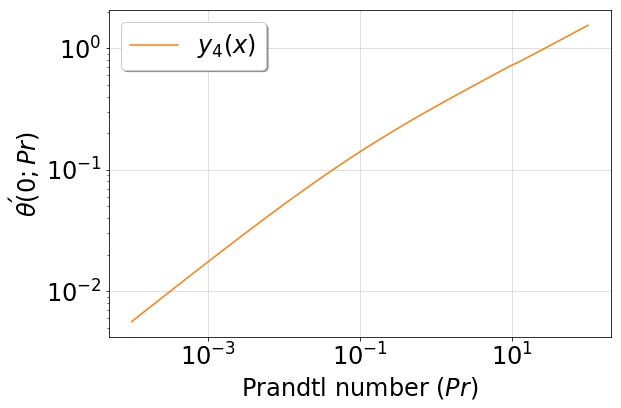

u/U_{\infty} = 0.99 when eta =  4.909914076637683
mean value of Pr exponent for low Pr is:  0.4904260671094449
mean value of Pr exponent for low Pr is:  0.3322966110483943
C for low Pr is: 0.5095270783158099
C for high Pr is: 0.3356615938546049


In [0]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from scipy.integrate import solve_bvp
import matplotlib

from scipy import interpolate


matplotlib.rcParams['font.size'] = 24
matplotlib.rcParams['legend.fontsize'] = 24


Pr = np.logspace(-4,2,60)

counter = 0
n=600
#theta = np.zeros((len(Pr),6,n))
thetap = np.zeros((len(Pr),n))
#thetap= []


for p in Pr:
  eps = 0.1
  
  def odetobesolved(t, y):
    #when mwedge = 0, you should get back the results of the flat plate solution
    return np.vstack((y[1], y[2], -0.5*y[0]*y[2], y[4], -0.5*p*y[4]*y[0])) 

  def odebc(ya, yb):
    return np.array([ya[0], ya[1],  yb[1]-1.0, ya[3]-1.0, yb[3]])
  
  xmax = np.max((10.0, 10*(1/p)**(0.5))) #Code to increase the range over which eta is integrated for low Pr fluids
 
  x = np.linspace(0.0, xmax, n)
  y = np.array([(1-np.exp(-x))*x, 1-np.exp(-x), x*np.exp(-x), (1-np.exp(-x))*x, 1-np.exp(-x)]) #initial guess

  sol = solve_bvp(odetobesolved, odebc, x, y)
  

  if sol.status != 0:
      print("WARNING: sol.status is %d" % sol.status)
  thetap[counter,:] = sol.y[4,0]
  counter += 1
  




#plt.subplot(3, 1, 1)
#plt.plot(sol.x, sol.y[0], color='#801010', label='$y_0(x)$')
#plt.grid(alpha=0.5)
#plt.legend(framealpha=1, shadow=True)
#plt.subplot(3, 1, 2)
#plt.plot(sol.x, sol.y[1], '-', color='C0', label='$y_1(x)$')
#plt.xlabel('$x$')
#plt.grid(alpha=0.5)
#plt.legend(framealpha=1, shadow=True)
#plt.subplot(1,1,1)

f, (ax1) = plt.subplots(1, figsize=(9,6))
ax1.plot(Pr,-thetap[:,0], '-', color='C1', label='$y_4(x)$')
ax1.grid(alpha=0.5)
ax1.legend(framealpha=1, shadow=True)
ax1.set_xlabel(r'Prandtl number $(Pr)$')
ax1.set_ylabel(r'$\theta\'(0;Pr)$')
ax1.set_xscale("log")
ax1.set_yscale("log")
plt.show()


f = interpolate.interp1d(sol.y[1], sol.x) #interpolating
print('u/U_{\infty} = 0.99 when eta = ', f(0.99))

#Exponent for Pr number - low Pr limit
#Choose Pr lower than 0.01
lowPr = Pr[0:20]
lowPrThetaPrime = thetap[0:20,0]
#The slope on the graph below is the exponent of Pr.
nlowPrApprox = np.log(lowPrThetaPrime[1:]/lowPrThetaPrime[0])/np.log(lowPr[1:]/lowPr[0])
#If we have done all things right, nlowPrApprox must be an array which is approximately the theoretical value.
print('mean value of Pr exponent for low Pr is: ', np.mean(nlowPrApprox))

modhiPr = Pr[40:]
modhiPrThetaPrime = thetap[40:,0]
nmodhiPrApprox = np.log(modhiPrThetaPrime[:-1]/modhiPrThetaPrime[-1])/np.log(modhiPr[:-1]/modhiPr[-1])
print('mean value of Pr exponent for low Pr is: ', np.mean(nmodhiPrApprox))

mean_nlowPr = np.mean(nlowPrApprox)
mean_nmodhiPr = np.mean(nmodhiPrApprox)

mean_ClowPr = -np.mean(lowPrThetaPrime/lowPr**mean_nlowPr)
mean_CmodhiPr = -np.mean(modhiPrThetaPrime/modhiPr**mean_nmodhiPr)

print('C for low Pr is:', mean_ClowPr)
print('C for high Pr is:', mean_CmodhiPr)

In [0]:
print(sol.y[2][0])
print((0.33206/12)**(1/3)/0.89298)

0.3320577726203251
0.3387167760575283
